# The CNOT Gate and the Bell State

You have already seen the Hadamard Gate which puts a single Qubit into a superposition.

## CNOT Gate

You will now see an example of the CNOT gate which involves two qubits
* The control qubit
* The target qubit


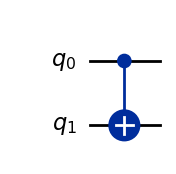

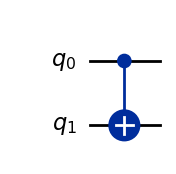

In [2]:
from qiskit import QuantumCircuit
%matplotlib inline

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)
# Create a controlled-NOT gate (CNOT) with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)
qc.draw('mpl')  # Draw the circuit using matplotlib

## Combining Gates

For anything to now happen we need the control qubit to do something. To get the control qubit to do something, we can put it through a Hadamard gate - which will put it into a superposition.

### Combining the Hadamard Gate and the CNOT Gate to form the Bell State
A combination of the hadamard gate and the CNOT gate is a great example of a slightly more sophisticated quantum circuit. When the control qubit is put into a superposition, then the target qubit will be affected due to the entanglement.

This results in two qubits that are either both 0 or both 1. This is because if the control qubit is 0 then the target is 0 since it does not get flipped. However, if the control qubit is flipped to a 1, then that will trigger the target qubit to flip.

This means that the only outcomes can be 0,0 or 1,1.

Below is the Python code for this. This combination of gates is known as the Bell State.

This type of Bell state where the values are both the same when measured is called Phi or Φ.


Total count for 00 and 11 are: {'00': 511, '11': 489}


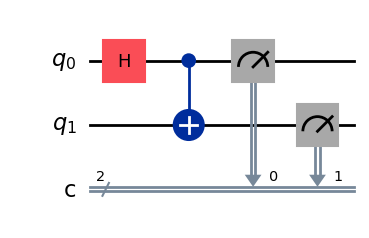

In [5]:
# Create a new circuit with 2 qubits and 2 classical bits for measurement
qc = QuantumCircuit(2,2)
# Apply a Hadamard gate to the first qubit to put it in superposition
qc.h(0)
# Apply a controlled-NOT gate again after the first qubit is in super position
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])  # Measure both qubits
# Draw the updated circuit
qc.draw('mpl')

# Run the circuit on a simulator
# Import the Aer simulator backend from Qiskit's Aer module
from qiskit_aer import Aer
from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
# This step adapts the circuit to the constraints and format of the backend
new_circuit = transpile(qc, backend)
# The circuit is executed multiple times (shots) to get a distribution of outcomes
job = backend.run(new_circuit, shots=1000)
# Import the job result from Qiskit
result = job.result()
# Returns counts
counts = result.get_counts()
# Print the results
print("\nTotal count for 00 and 11 are:", counts)


## Creating a Bell State with value |01⟩ or |10⟩

You can also create Bell states with the opposite values.

1. Start with |00⟩
2. Apply Hadamard to first qubit
3. Apply CNOT with first qubit as control
4. Apply X gate to second qubit

This type of Bell state where the values are opposite when measured is called Psi or Ψ.

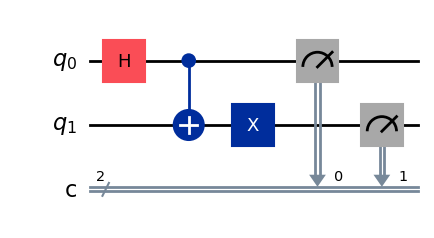

{'10': 503, '01': 497}


In [16]:
# Create a quantum circuit for the Ψ+ Bell state
psi_plus = QuantumCircuit(2, 2)

# Create the standard Φ+ Bell state first
psi_plus.h(0)           # Apply Hadamard to first qubit
psi_plus.cx(0, 1)       # Apply CNOT with first as control

# Transform Φ+ into Ψ+ by flipping second qubit
psi_plus.x(1)           # Apply X gate to second qubit

# Measure both qubits
psi_plus.measure([0, 1], [0, 1])

# Visualize the circuit
diagram = psi_plus.draw('mpl')
display(diagram)
# Run the circuit
compiled_psi_plus = transpile(psi_plus, backend=backend)
counts_psi_plus = backend.run(compiled_psi_plus, shots=1000).result().get_counts()

# Display the results
print(counts_psi_plus)


## Creating Different Bell States

To create these different Bell states, you typically:

1. Start with |00⟩
2. Apply a Hadamard to the first qubit
3. Apply a CNOT with the first qubit as control
4. Apply additional gates as needed:

The Z gate will be explained later - as will the +ve and -ve bell states. 

* $|\Phi^+\rangle$: No additional gates (this is what you get directly)

* $|\Phi^-\rangle$: Apply a Z gate to the second qubit

* $|\Psi^+\rangle$: Apply an X gate to the second qubit

* $|\Psi^-\rangle$: Apply both X and Z gates to the second qubit